<a href="https://colab.research.google.com/github/Juciana-Lima/Juciana-Lima/blob/main/C%C3%B3pia_de_Extrato_Saving_Extraindo_dados_pdf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tabula-py
from tabula import read_pdf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 26.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import warnings
warnings.filterwarnings("ignore")


In [ ]:
from IPython.lib.display import sep
df=read_pdf('/content/extrato_cef_s.pdf', )

In [ ]:
import tabula
lista_tabelas=tabula.read_pdf('/content/extrato_cef_s.pdf')

In [ ]:
print(len(lista_tabelas))

1


In [ ]:
for tabela in lista_tabelas:
  display(tabela)

,data,histórico,valor
0,24/04/2024,REM BASICA,1.24
1,24/04/2024,CRED JUROS,7.16
2,25/04/2024,REM BASICA,2.97
3,25/04/2024,CRED JUROS,13.20
4,01/05/2024,REM BASICA,83.71
5,01/05/2024,CRED JUROS,409.56
6,02/05/2024,REM BASICA,10.51
7,02/05/2024,CRED JUROS,61.37
8,03/05/2024,REM BASICA,3.02
9,03/05/2024,CRED JUROS,17.76


from matplotlib import pyplot as plt
tabela['valor'].plot(kind='hist', bins=20, title='valor')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
tabela.groupby('histórico').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
tabela['valor'].plot(kind='line', figsize=(8, 4), title='valor')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(tabela['histórico'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(tabela, x='valor', y='histórico', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

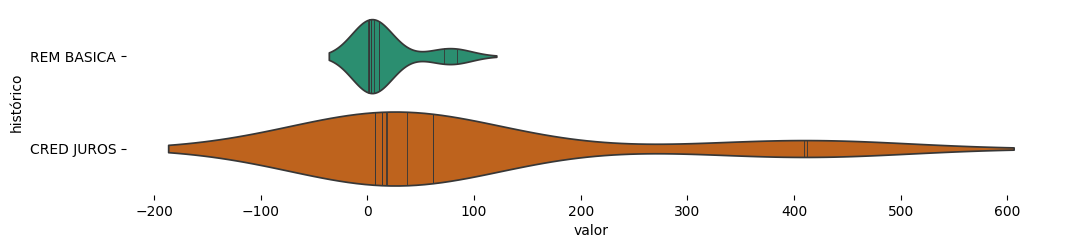

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(tabela['histórico'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(tabela, x='valor', y='histórico', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

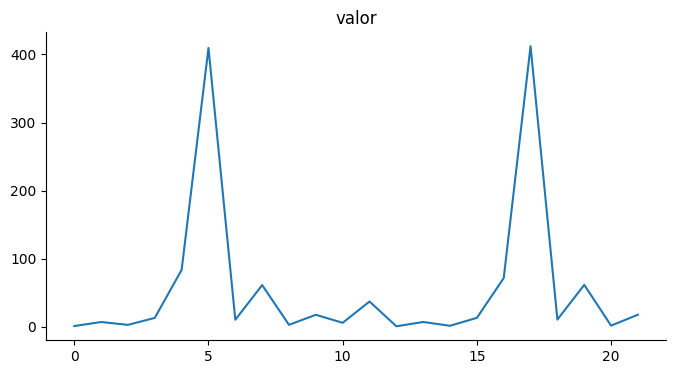

In [ ]:
from matplotlib import pyplot as plt
tabela['valor'].plot(kind='line', figsize=(8, 4), title='valor')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
tabela.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   data       22 non-null     object 
 1   histórico  22 non-null     object 
 2   valor      22 non-null     float64
dtypes: float64(1), object(2)
memory usage: 656.0+ bytes


In [ ]:
tabela.isna().sum()

DATA MOV.     0
NR.DOC        0
HISTÓRICO     0
COTAS        22
VALOR         0
dtype: int64

In [ ]:
tabela.head()


,data,histórico,valor
0,24/04/2024,REM BASICA,"1,24"
1,24/04/2024,CRED JUROS,"7,16"
2,25/04/2024,REM BASICA,"2,97"
3,25/04/2024,CRED JUROS,"13,20"
4,01/05/2024,REM BASICA,"83,71"


In [ ]:
tabela.drop(["COTAS"],axis=1, inplace=True)

In [ ]:
tabela.drop(['NR.DOC'],axis=1, inplace=True)

In [ ]:
tabela.rename({"DATA MOV.":"data"}, axis=1, inplace=True)

In [ ]:
tabela.rename({"históricoo":"histórico"}, axis=1, inplace=True)

In [ ]:
tabela.rename({"VALOR":"valor"}, axis=1, inplace=True)

In [ ]:
tabela.drop(['0,1'],axis=1, inplace=True)

In [ ]:
tabela.groupby("histórico").sum().reset_index()

,histórico,data,valor
0,CRED JUROS,24/04/202425/04/202401/05/202402/05/202403/05/...,1058.34
1,REM BASICA,24/04/202425/04/202401/05/202402/05/202403/05/...,194.22


In [ ]:
tabela.dtype

data         object
histórico    object
valor        object
dtype: object

In [ ]:
tabela["valor"]=tabela["valor"].apply(lambda x: str(x).replace(",","."))

In [ ]:
tabela["valor"]=tabela["valor"].astype('float64')

In [ ]:
tabela["valor"].describe()

count     22.000000
mean      56.934545
std      117.232929
min        0.900000
25%        3.767500
50%       11.965000
75%       55.342500
max      411.960000
Name: valor, dtype: float64

In [ ]:
tabela["valor"].sum().round(2)

1252.56